# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Gathering, Processing and Cleaning the data

In [3]:
house = pd.read_csv('housing.csv')

In [4]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

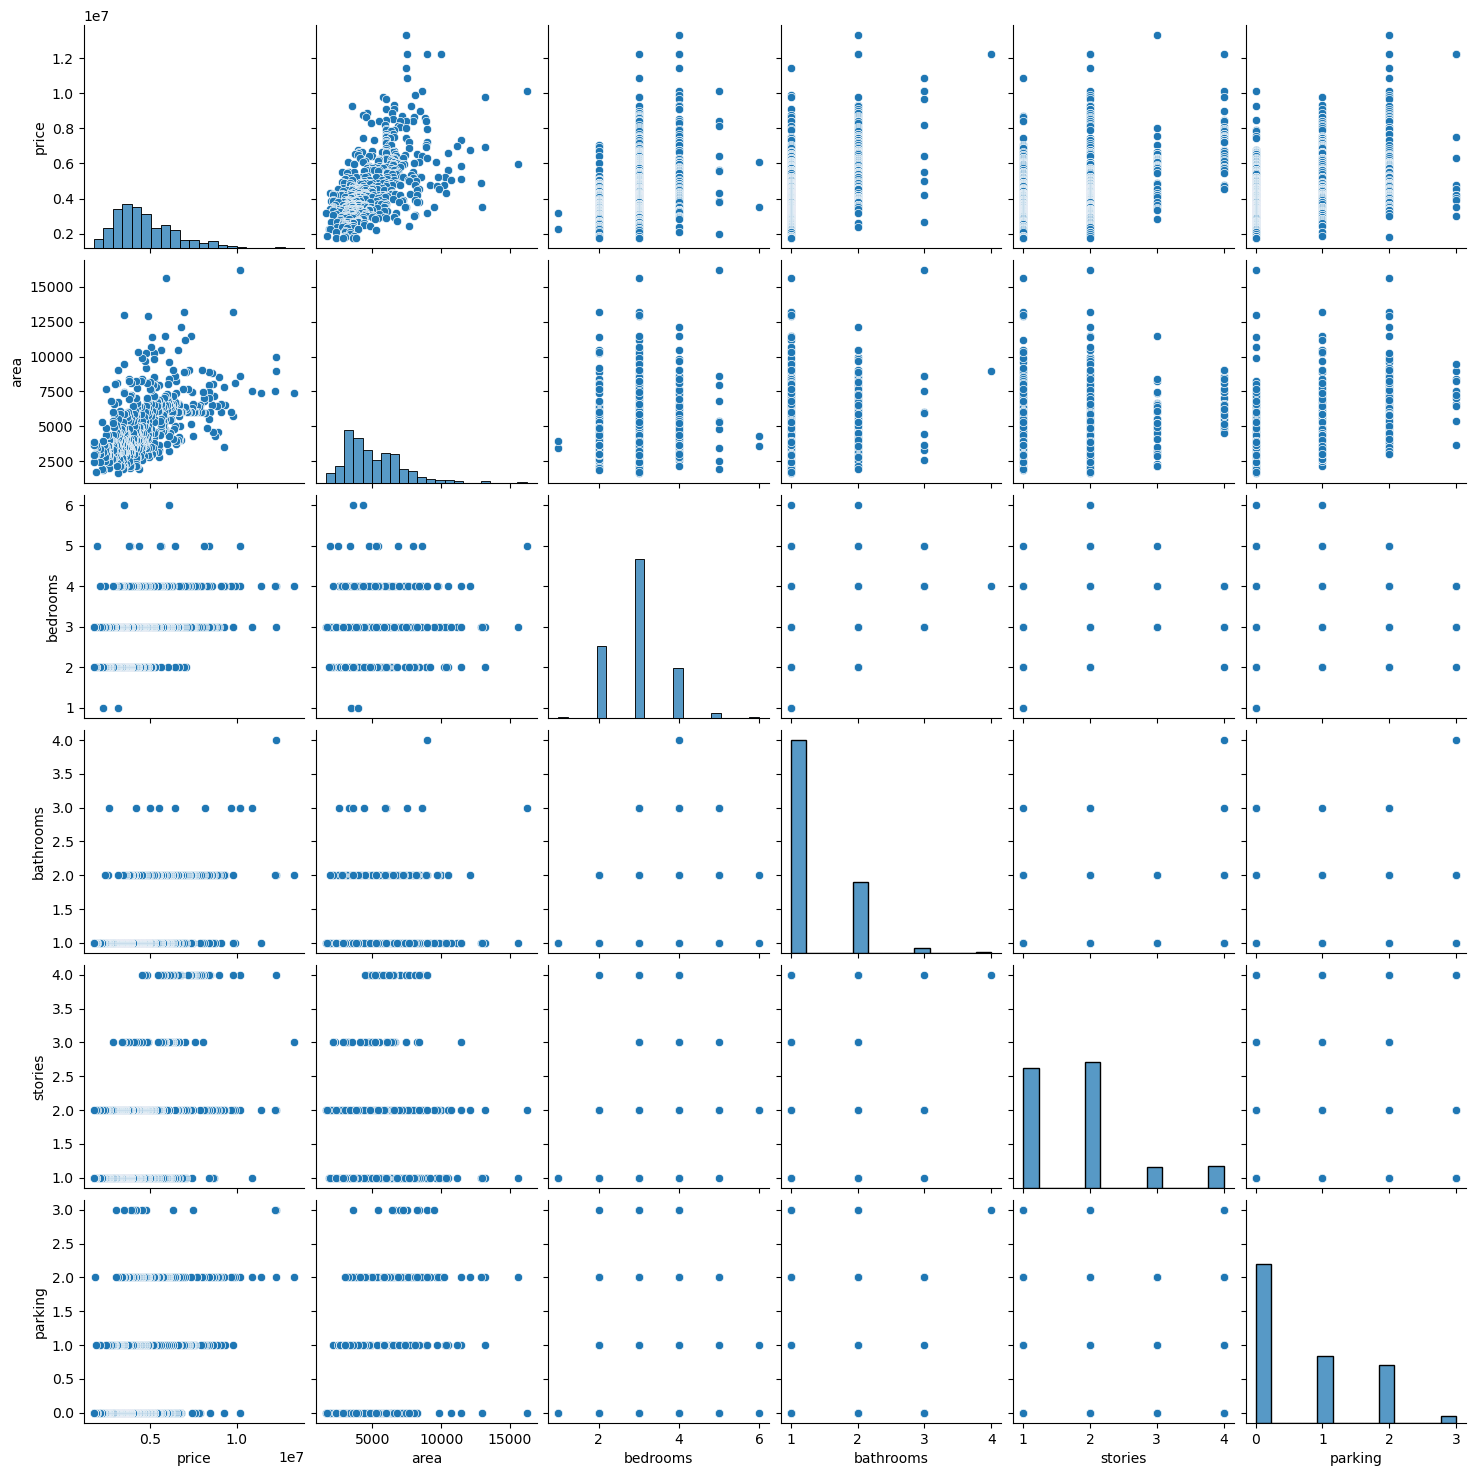

In [6]:
sns.pairplot(house)
plt.show()

In [7]:
sns.histplot(house['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

# Training and Testing

In [8]:
# Convert categorical variables to numerical using one-hot encoding
house = pd.get_dummies(house, columns=['area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

In [9]:
# X and y List
X = house.drop('price', axis=1)
y = house['price']

In [10]:
# Split Data into Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [11]:
# Create and Train Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
# Linear Regression Model Evaluation
intercept = lm.intercept_
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [13]:
sns.histplot(house['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

# Prediction

In [14]:
# Predictions
predictions_lm = lm.predict(X_test)

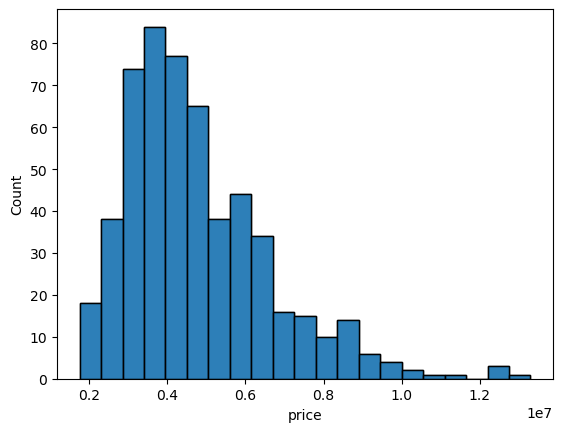

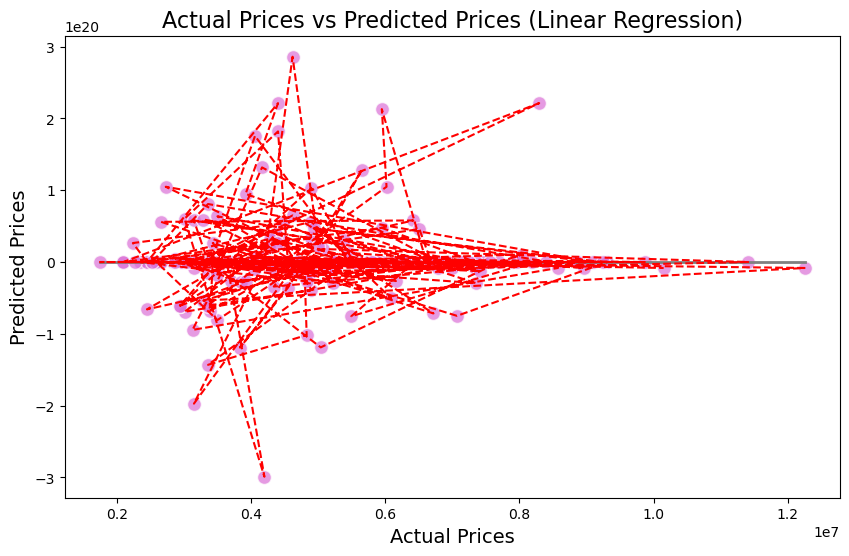

In [15]:
# Scatter plot with diagonal line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_lm, alpha=0.7, c='orchid', edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='gray', linewidth=2)
plt.title('Actual Prices vs Predicted Prices (Linear Regression)', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.plot(y_test, predictions_lm, color='red', linestyle='--') #trend line

plt.show()

# Regression Evaluation Metrics

In [16]:
mae_lm = metrics.mean_absolute_error(y_test, predictions_lm)
mse_lm = metrics.mean_squared_error(y_test, predictions_lm)
rmse_lm = np.sqrt(mse_lm)

print(f'Mean Absolute Error (Linear Regression): {mae_lm:.2f}')
print(f'Mean Squared Error (Linear Regression): {mse_lm:.2f}')
print(f'Root Mean Squared Error (Linear Regression): {rmse_lm:.2f}')

Mean Absolute Error (Linear Regression): 25273498235316056064.00
Mean Squared Error (Linear Regression): 3120435170262550826327555676319082610688.00
Root Mean Squared Error (Linear Regression): 55860855437976879104.00
